In [56]:
from auditory_stimulation.audio import Audio, load_wav_as_audio
from auditory_stimulation.auditory_tagging.assr_tagger import AMTagger, FlippedFMTagger, FMTagger
from auditory_stimulation.auditory_tagging.auditory_tagger import AAudioTagger
from auditory_stimulation.auditory_tagging.noise_tagging_tagger import NoiseTaggingTagger
from auditory_stimulation.auditory_tagging.shift_tagger import ShiftSumTagger, BinauralTagger, SpectrumShiftTagger
from auditory_stimulation.auditory_tagging.raw_tagger import RawTagger
from auditory_stimulation.auditory_tagging.tag_generators import sine_signal
from auditory_stimulation.view.sound_players import psychopy_player

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def do_analysis(tagger: AAudioTagger, audio: Audio, title: str, play_audio: bool = True) -> None:
    modified = tagger.create(audio, [(audio.secs - 4, audio.secs)])

    if play_audio:
        #psychopy_player(audio)
        #time.sleep(3)
        psychopy_player(modified)

    fig, ax = plt.subplots(3, 1)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    fig.suptitle(title)

    ax[0].set_title("Audio signal")
    ax[0].plot(audio.array[:, 0])
    ax[0].plot(modified.array[:, 0])
    
    modified_spectrum = np.abs(np.fft.fftshift(np.fft.fft(modified.array[:, 0])))
    original_spectrum = np.abs(np.fft.fftshift(np.fft.fft(audio.array[:, 0])))

    frequency_multiplier = audio.sampling_frequency / modified_spectrum.shape[0]

    f_cutoff = 80
    f_step = 5
    max_sample = int(f_cutoff / frequency_multiplier)
    ticks = np.arange(0, max_sample, f_step / frequency_multiplier)
    labels = np.array(ticks * frequency_multiplier, dtype=np.int64)

    ax[1].set_title("Zoomed in spectrum")
    ax[1].set_xticks(ticks, labels)
    middle = len(original_spectrum) // 2
    ax[1].plot(original_spectrum[middle: middle+max_sample])
    ax[1].plot(modified_spectrum[middle: middle+max_sample])

    f_cutoff = 5000
    f_step = 200
    max_sample = int(f_cutoff / frequency_multiplier)
    ticks = np.arange(0, max_sample, f_step / frequency_multiplier)
    labels = np.array(ticks * frequency_multiplier, dtype=np.int64)
   
    ax[2].set_title("Large spectrum")
    ax[2].set_xticks(ticks, labels)
    ax[2].plot(original_spectrum[middle:middle+max_sample])
    ax[2].plot(modified_spectrum[middle:middle+max_sample])

    fig.savefig(f"{title}_4s.png")
    plt.close(fig)
    # plt.show()




In [12]:
audio = load_wav_as_audio("../stimuli_sounds/legacy/test.wav")
# audio = load_wav_as_numpy_array("../stimuli_sounds/legacy/440.wav")

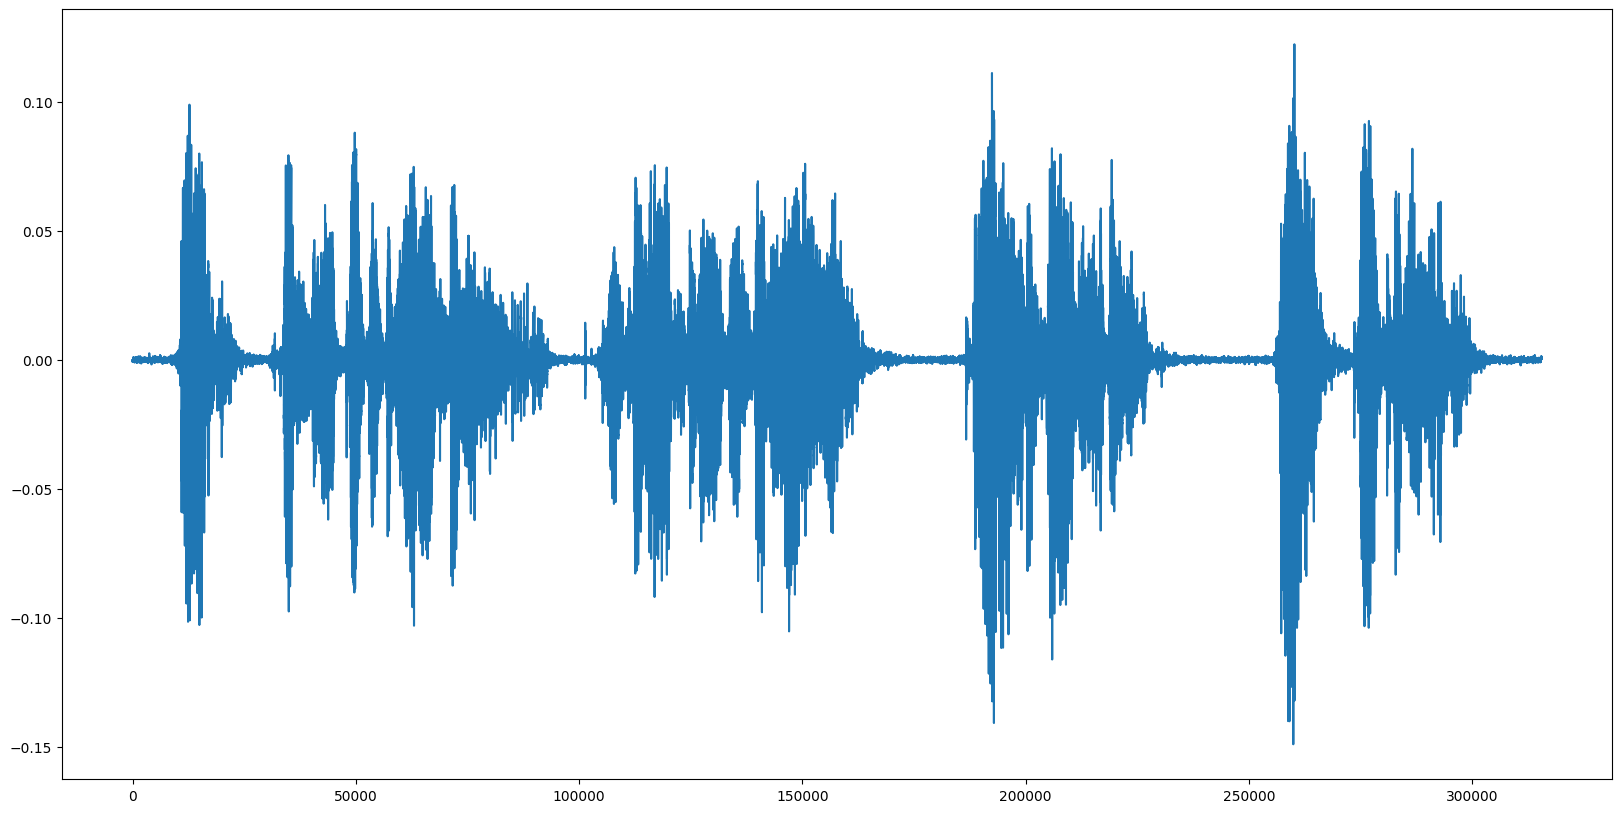

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(audio.array[:, 0])
plt.show()

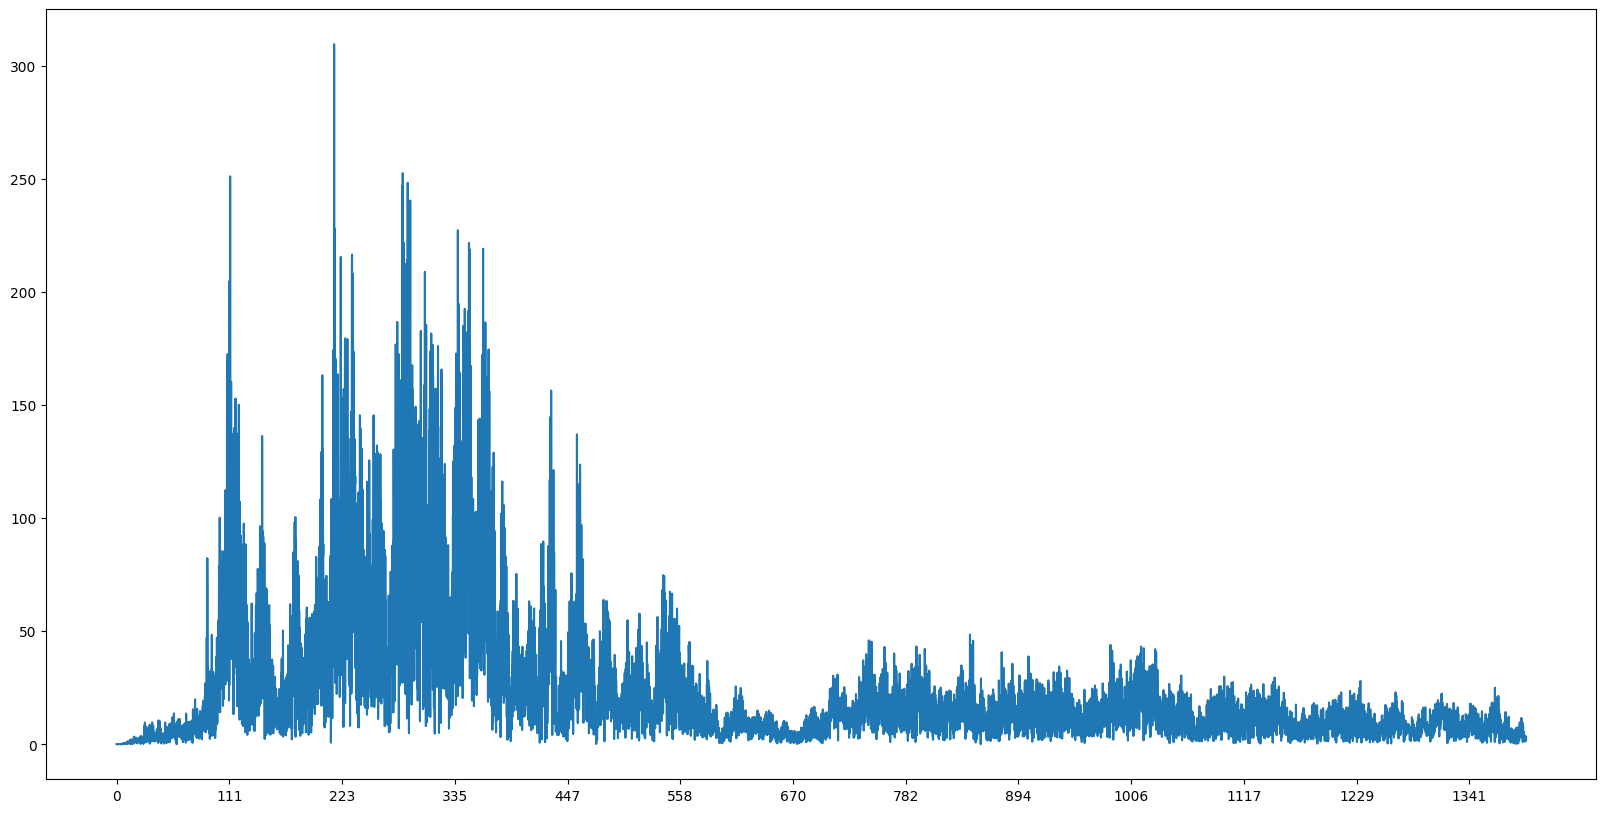

In [8]:
plt.figure(figsize=(20, 10))

frequency_multiplier = audio.sampling_frequency / audio.array.shape[0]
step = 800
original = range(0, 10000, step)
modified = [int(ele * frequency_multiplier) for ele in original]
plt.xticks(original, modified)

plt.plot(
    np.abs(
        np.fft.fftshift(np.fft.fft(audio.array[:, 0]))[audio.array.shape[0] // 2: audio.array.shape[0] // 2 + 10000]))
plt.show()

In [71]:
taggers = [(AMTagger(42, sine_signal), "AMTagger"),
            (FlippedFMTagger(40, 0.8), "FlippedFMTagger"),
            (NoiseTaggingTagger(44100, 126, 256, np.random.default_rng(42)), "NoiseTaggingTagger"),
            (FMTagger(40, 100), "FMTagger"),
            (ShiftSumTagger(40), "ShiftSumTagger"),
            (SpectrumShiftTagger(40), "SpectrumShiftTagger"),
            (BinauralTagger(40), "BinauralTagger"),
            (RawTagger(), "RawTagger")]

In [75]:
for tagger, label in taggers:
    do_analysis(tagger, audio, label, False)